In [17]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="5" color="red">ch12_데이터시각화_1절_Matplotlib</font></b>

- 시각화 라이브러리 : matplotlib, seaborn (데이터시각화), folium (지도시각화)
    * matplotlib : 파이썬에서 가장 쉽세 많이 사용하는 시각화 라이브러리, 판다스 내부에 포함
    * seaborn : matplotlib기반으로 다양한 색, 테마, 챠트기능과 groupby 기능 포함된 라이브러리

# 1절. matplotlib

- [matplotlib] https://pypi.org/project/matplotlib/
- [matplotlib API Reference] https://matplotlib.org/stable/api/index

In [8]:
import matplotlib
matplotlib.__version__

'3.7.0'

## 1.1. 패키지 import 및 기본 설정

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 더 높은 해상도로 그려줌
%config InlineBackend.figure_format = 'retina'

# 한글설정
# plt.rc 는 환경설정
plt.rc('font', family='AppleGothic') # Mac
plt.rc('axes', unicode_minus=False) # 축의 - 꺠짐 방지
# plt.rc('font', family='AppleGothic')
# plt.rc('font', family='Malgun Gothic') # 윈도우즈
# plt.rcParams['font.family'] = "AppleGothic" 

# warning (경고) 안보이게

## 1.2. 그래프 그리기

- matplotlib으로 그래프 그리기 위한 단계
    1. 데이터 준비 
    2. 그래프 생성
    3. 그래프 함수로 그리기
    4. 그래프 커스터마이징 (타이틀 및 목차...등등)
    5. 그래프 출력 및 저장

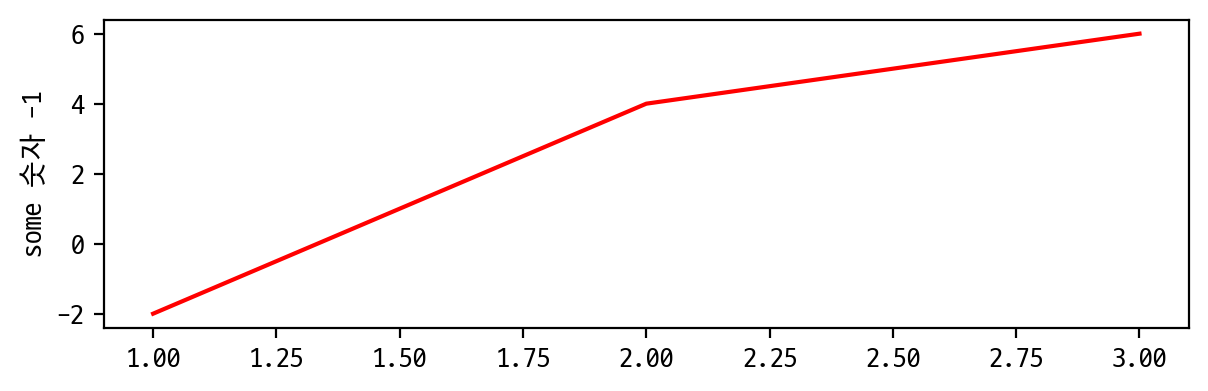

In [28]:
x = [1, 2, 3]  # 1) 데이터 준비
y = [-2, 4, 6]

plt.figure(figsize=(7, 2))  # 2) 그래프 객체 생성
plt.plot(x, y, color='r')  # 3) 그래프 함수
# plt.ylabel('some number') # 4) 그래프 커스터마이징
plt.ylabel('some 숫자 -1')
plt.show() # 5) 그래프 화면 출력 cf. plt.savefig('파일명.jpg')

## 1.3. 그래프영역 나누기

### 1) subplot() 함수로 서프플롯 추가



In [14]:
import numpy as np

In [27]:

x = np.arange(0, 10, 0.01)
len(x)

1000

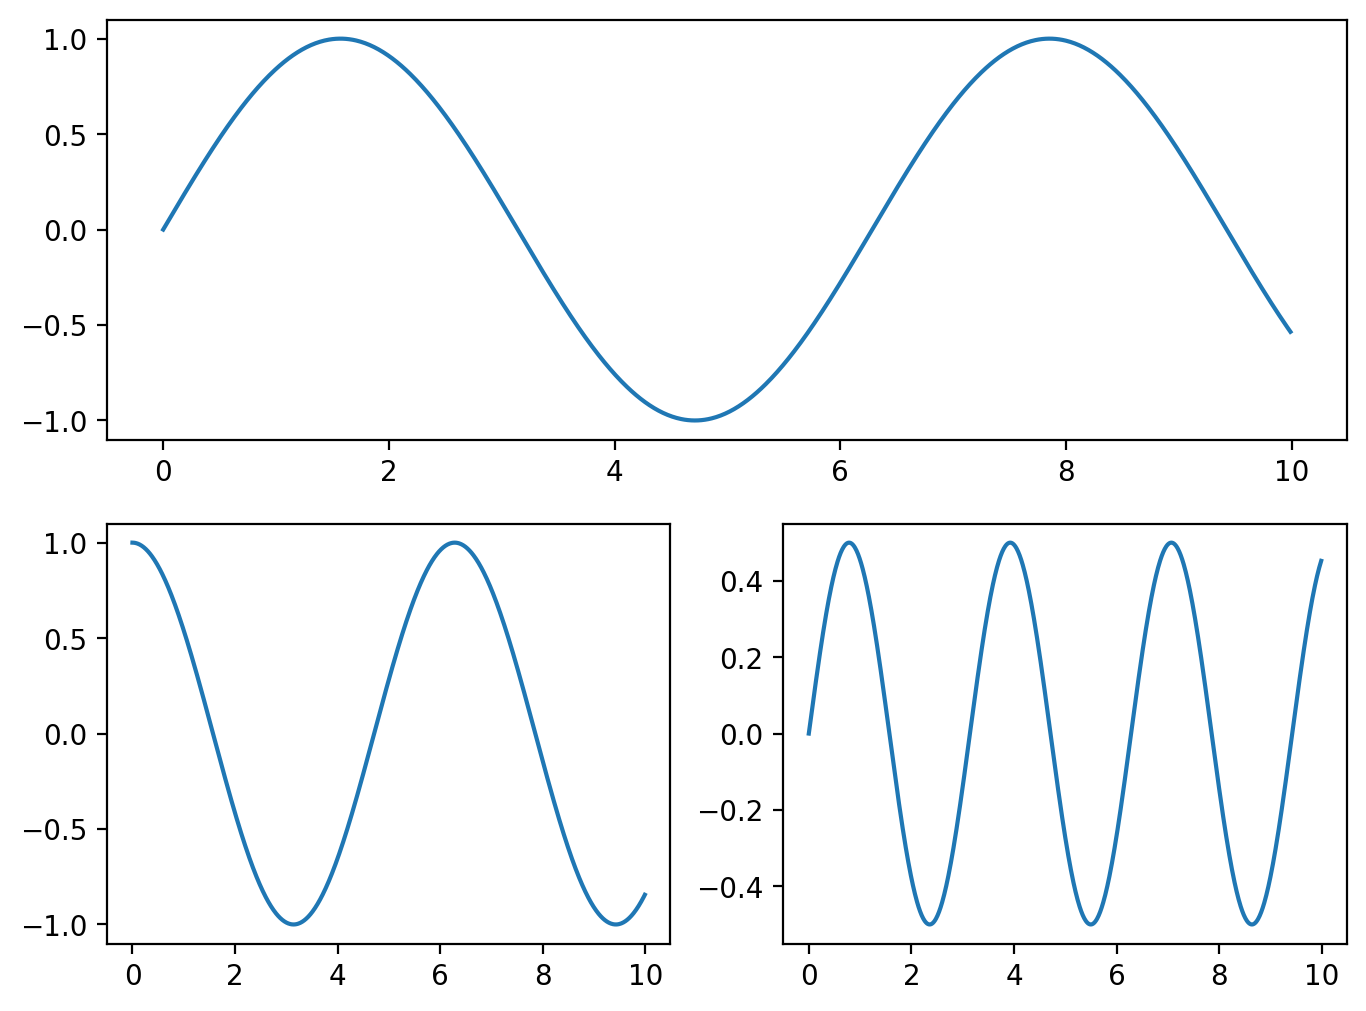

In [34]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3); plt.plot(x, np.cos(x))
plt.subplot(224); plt.plot(x, np.sin(x) * np.cos(x)) # subplot(224) = subplot(2, 2, 4)

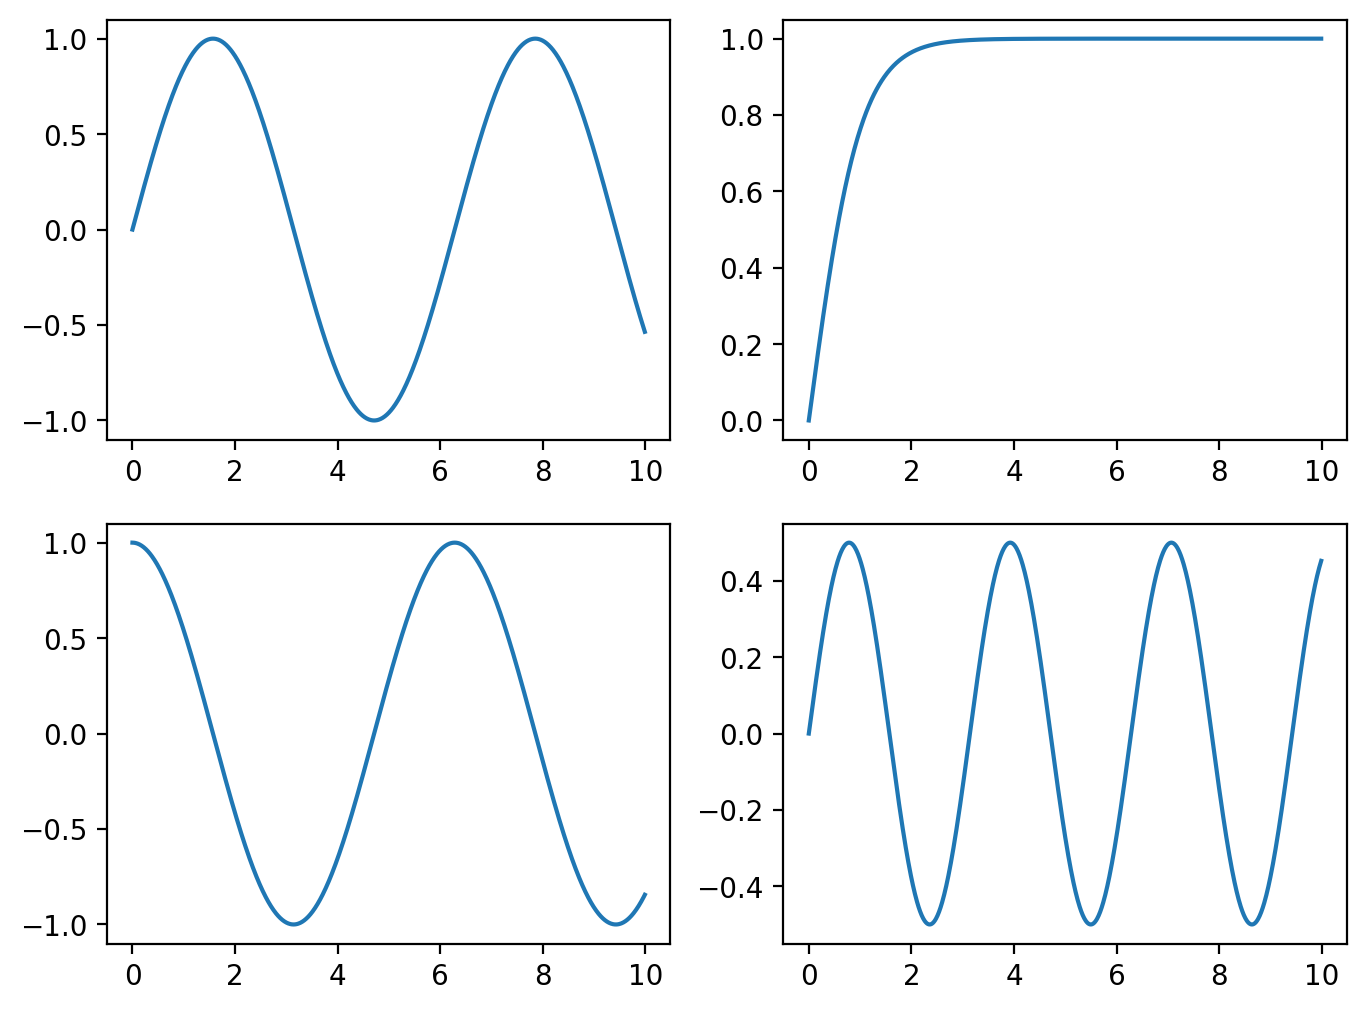

In [56]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 2); plt.plot(x, np.tanh(x))
plt.subplot(2, 2, 3); plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4); plt.plot(x, np.sin(x) * np.cos(x)) 

### 2) subplots() 함수로 서브플롯 추가

- 교안 (14page) [Matplotlib 색상 지정하기] https://wikidocs.net/92085

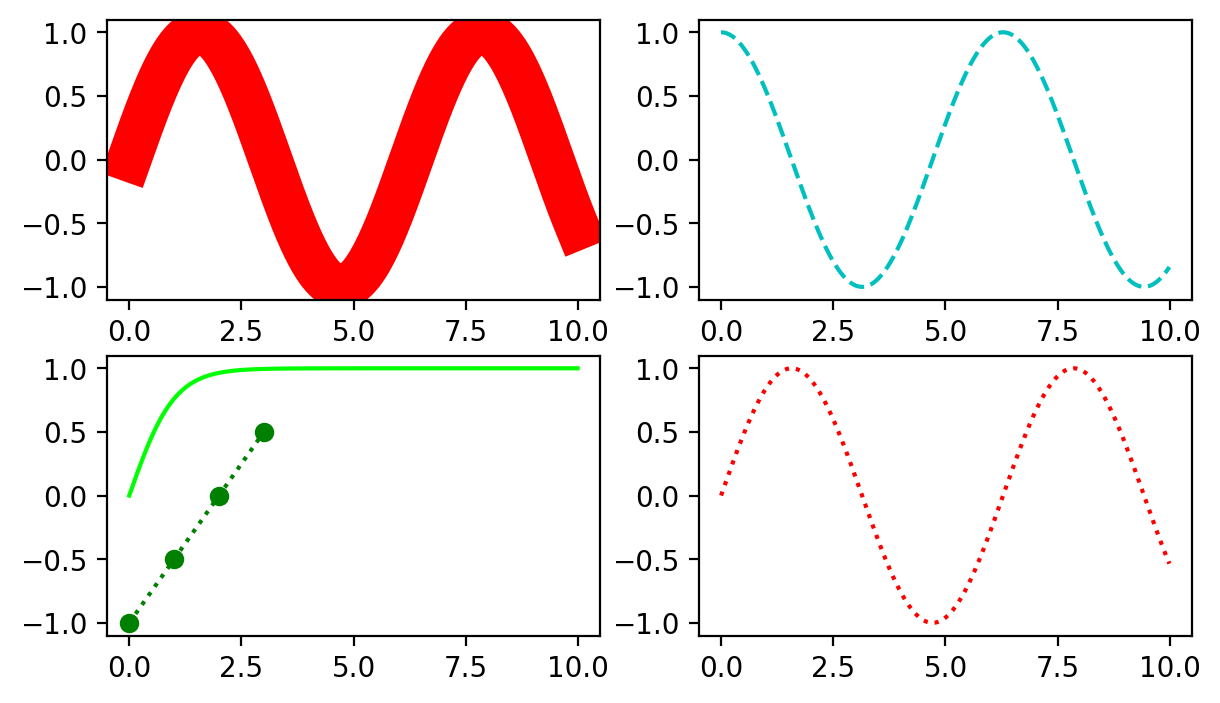

In [55]:
# 2행 2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 4))
axes[0, 0].plot(x, np.sin(x), 'r', linewidth=16)
axes[0, 1].plot(x, np.cos(x), 'c--')  # color=c, linestyle=':','--','-'
axes[1, 0].plot([0, 1, 2, 3], [-1, -0.5, 0, 0.5],
                'go:')  # color='r', maker='o'
axes[1,0].plot(x, np.tanh(x), '#00ff00')
axes[1,1].plot(x, np.sin(x), 'r:')
plt.show()

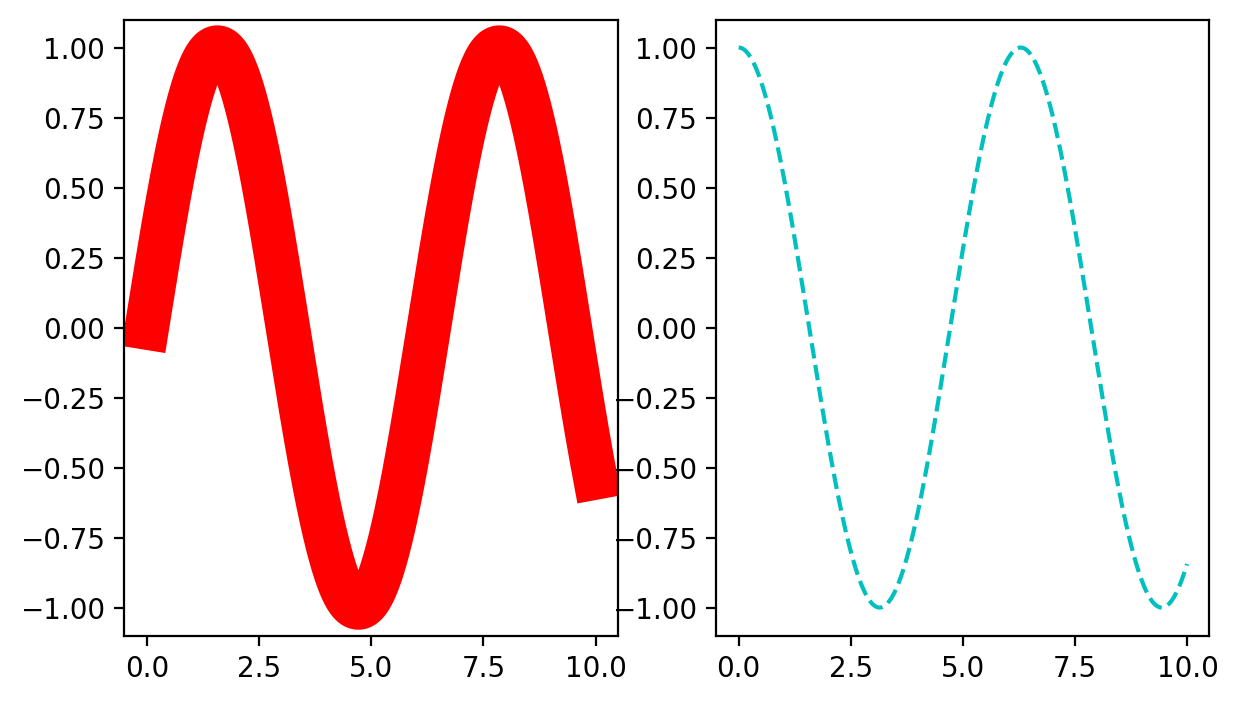

In [65]:
# 1행 2열 서브플롯
fig, axes = plt.subplots (ncols=2, figsize=(7, 4))
axes
axes[0].plot(x, np.sin(x), 'r', linewidth=16)
axes[1].plot(x, np.cos(x), 'c--')  # color=c, linestyle=':','--','-'

### 3) pandas.DataFrame.plot()

- plt.plot(x, y, fmt)
- df.plot(x=열이름, y=열이름, kind='line', figsize, title, xlim, ylim...)
    * kind : line (기본값), scatter (점도포), bar, bath , box, pie, density, ...
    * xlim, ylim : list / tuple

In [3]:
from seaborn import load_dataset

iris = load_dataset('iris')
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
61,5.9,3.0,4.2,1.5,versicolor


[범례사용] https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

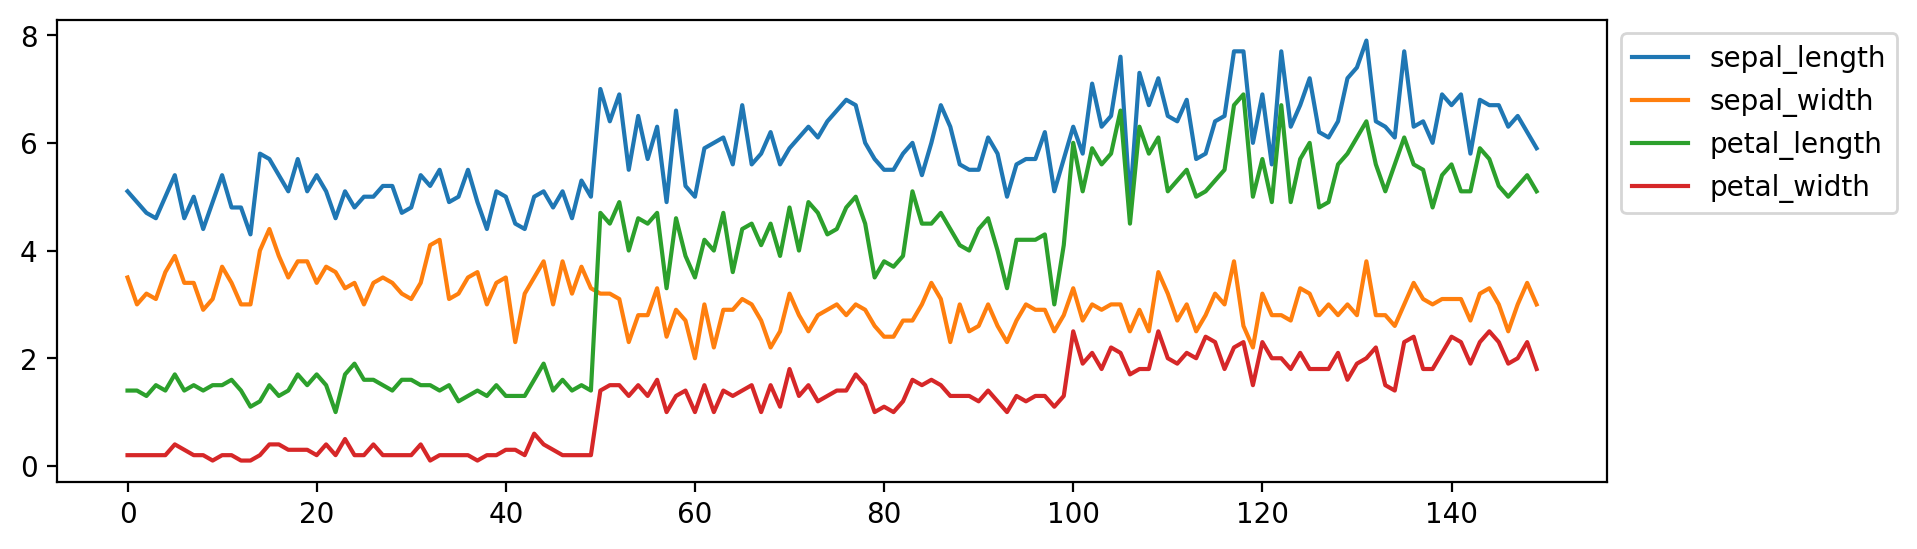

In [12]:
# iris.plot(x='petal_length', y='petal_width')
g = iris.plot(kind='line', figsize=(10, 3))
# Put the legend out of the figure
# g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.savefig("data/ch12_iris.png", bbox_inches = 'tight')
# plt.show()

In [91]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


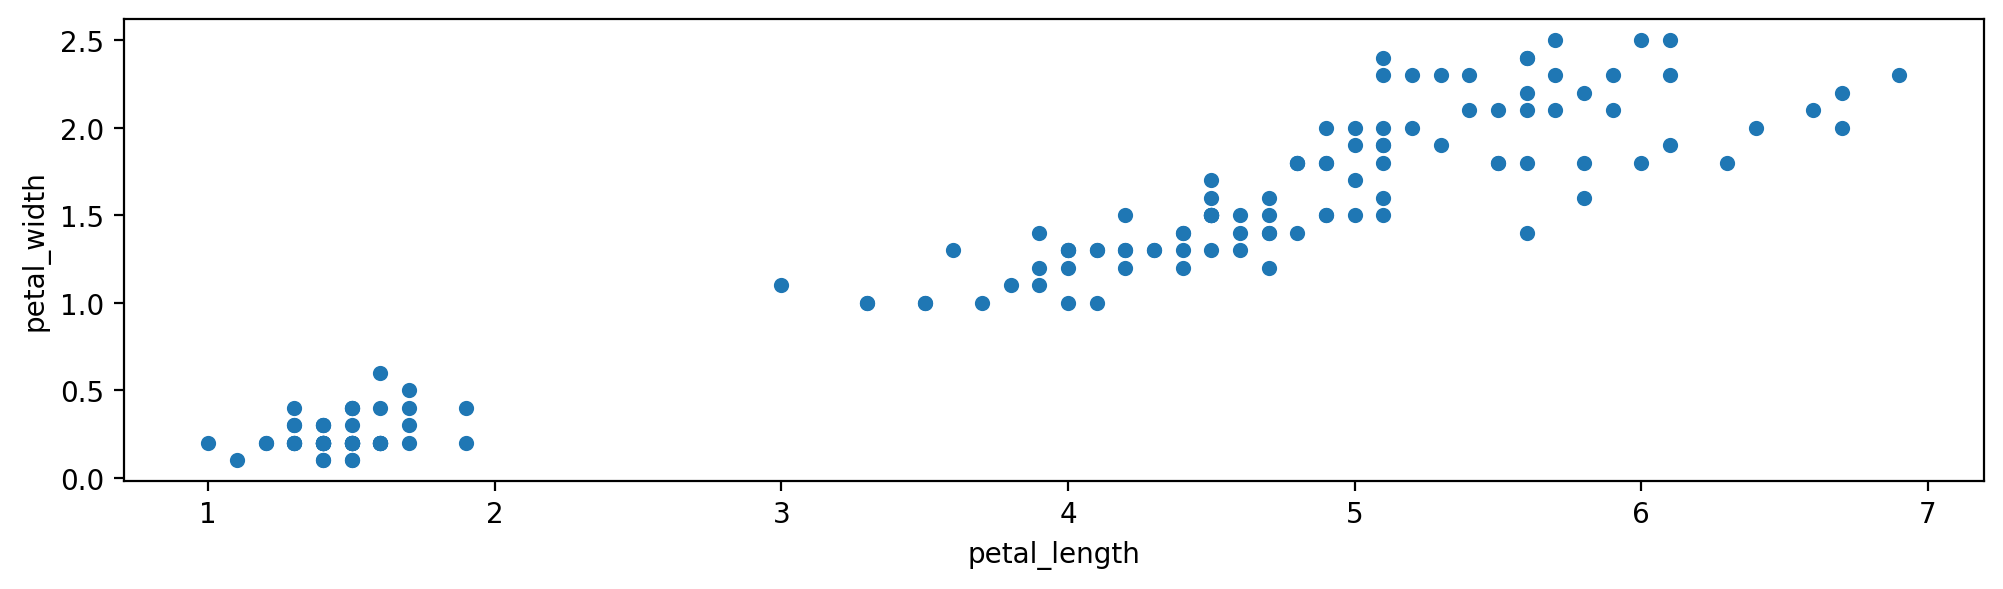

In [93]:
iris.plot(x='petal_length',y='petal_width', kind='scatter', figsize=(12,3))
plt.show()

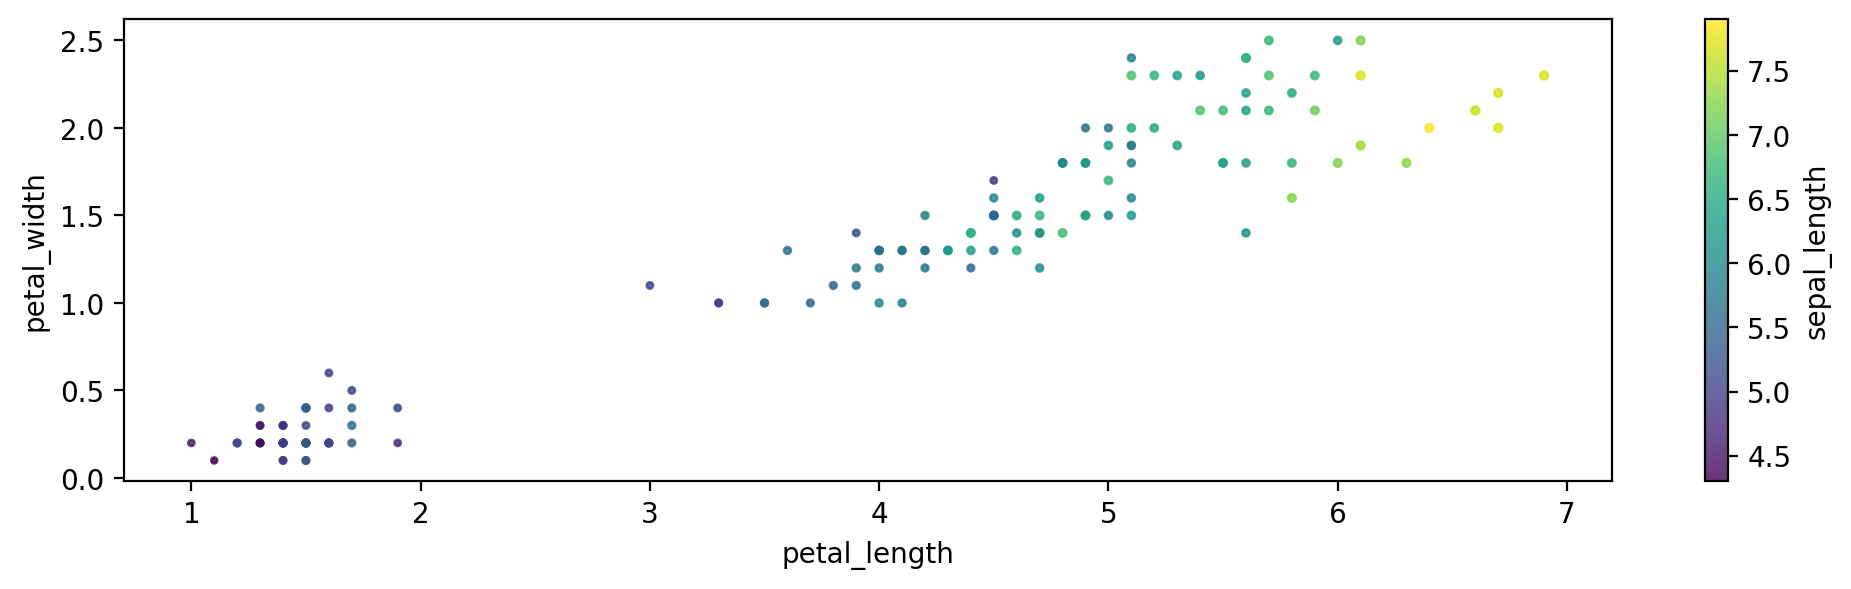

In [99]:
iris.plot(
    kind='scatter',
    x='petal_length',
    y='petal_width',
    figsize=(12, 3),
    s='sepal_length', # size
    c='sepal_length', # color
    alpha=.8  # 0<=투명도<=1
)
plt.show()

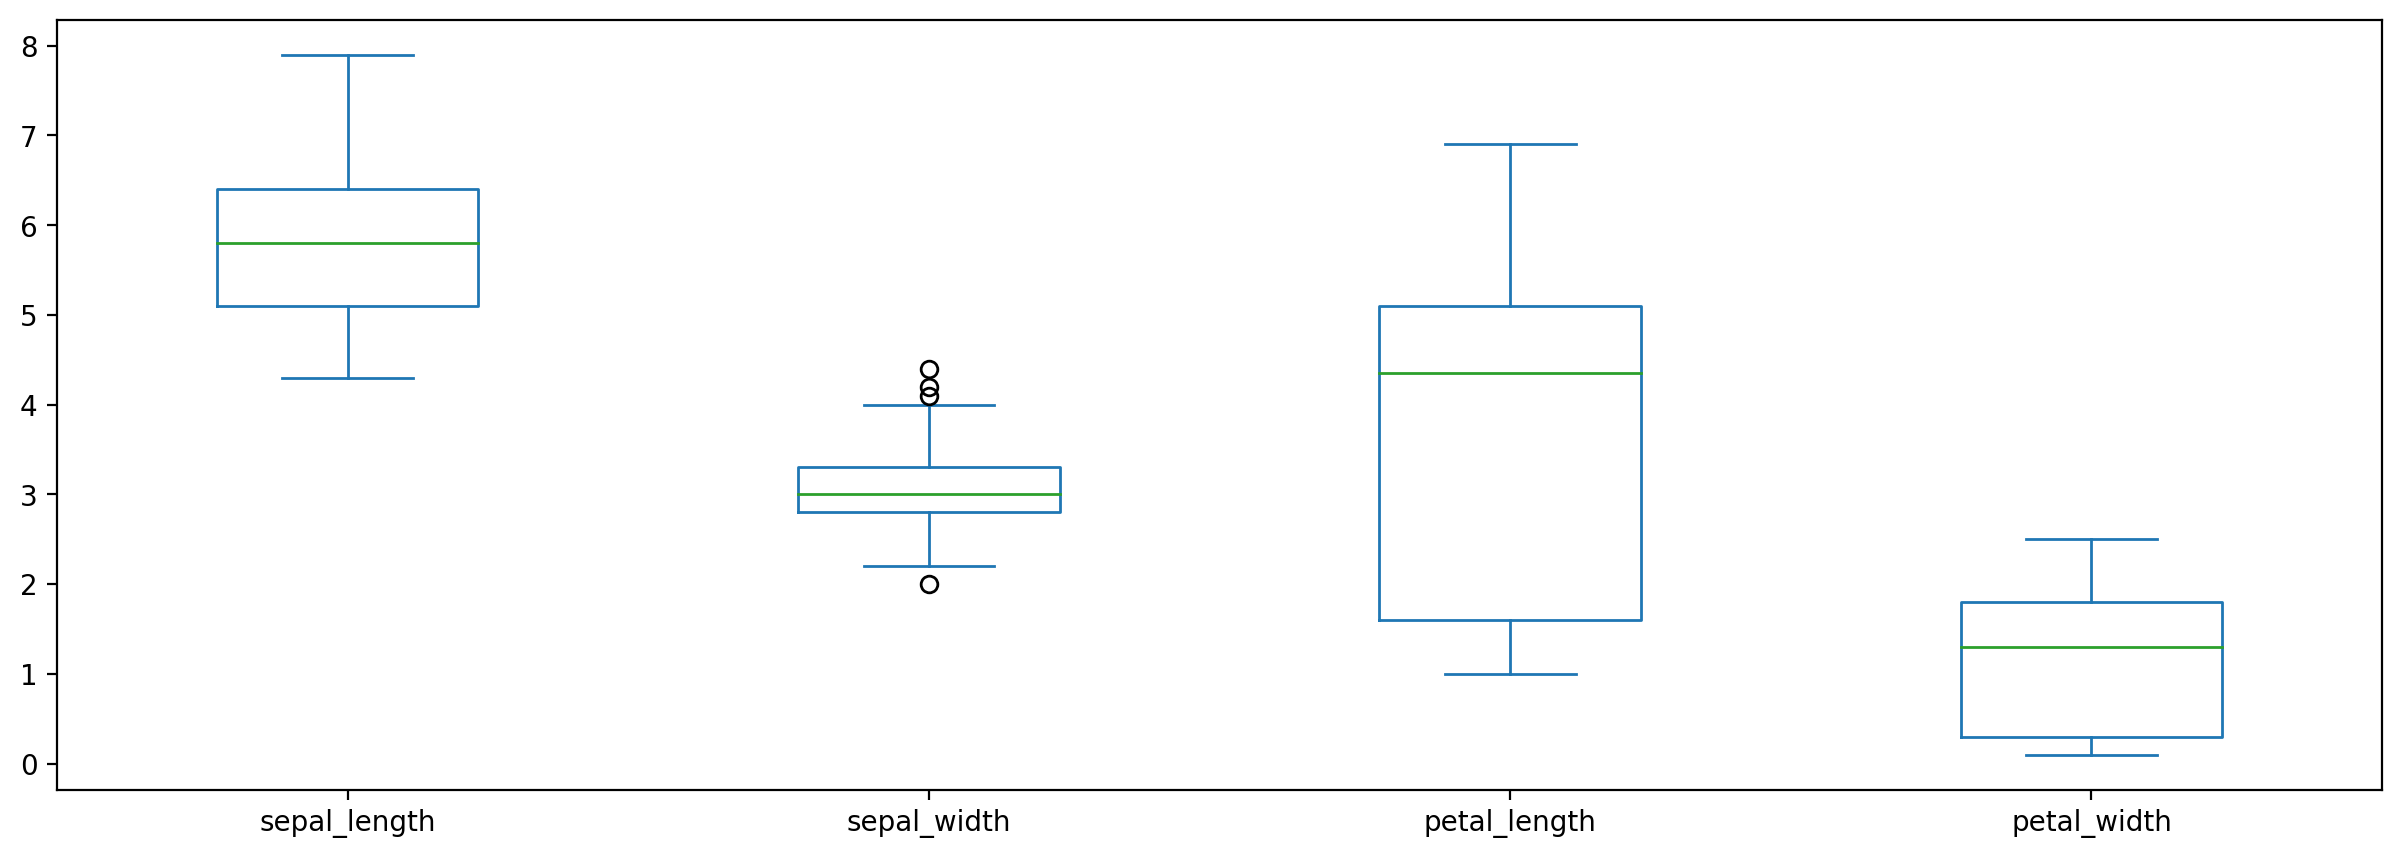

In [108]:
# 모든 열의 boxplot(이상치 여부, q1, q2, q3, min, max)
iris.plot(kind='box', figsize=(15,5))
plt.show()

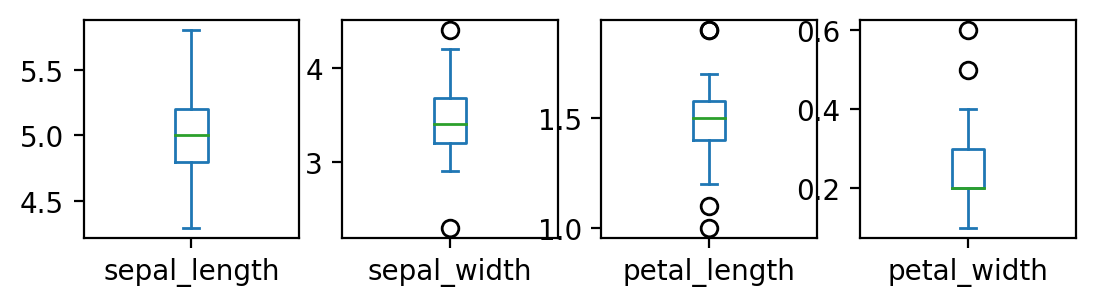

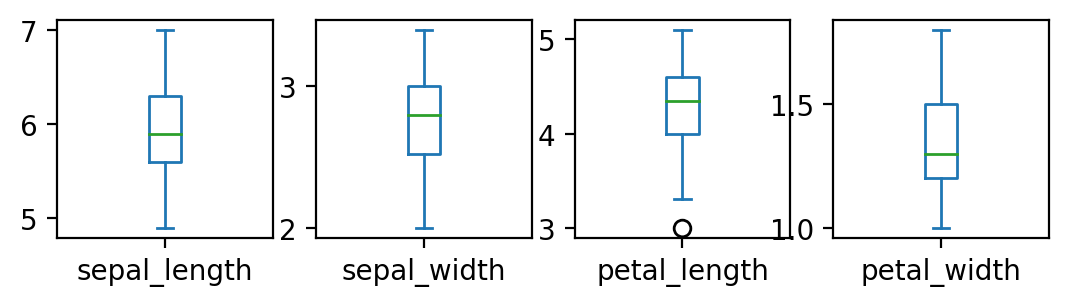

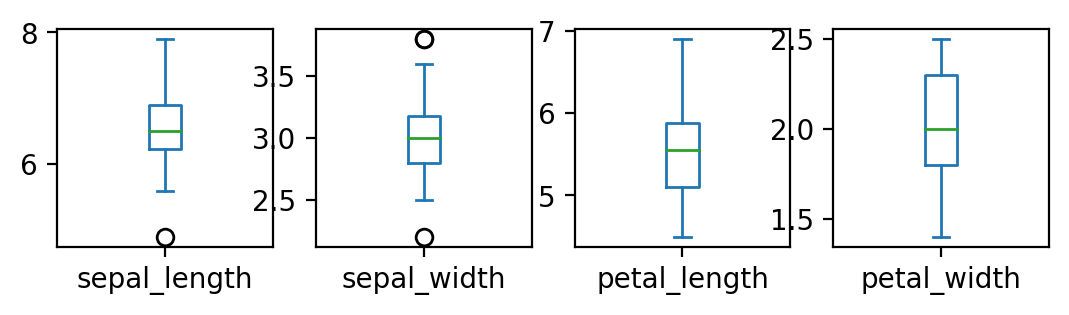

In [115]:
# 종별 boxplot
# iris
iris.groupby('species').plot(kind="box", subplots=True, layout=(3, 4), sharex=True) # sharex=True X축공유
plt.show()

## 1.4. 다양한 그래프 그리기

- [pyplot함수들] https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.html

### 1) plt.scatter() : 산점도

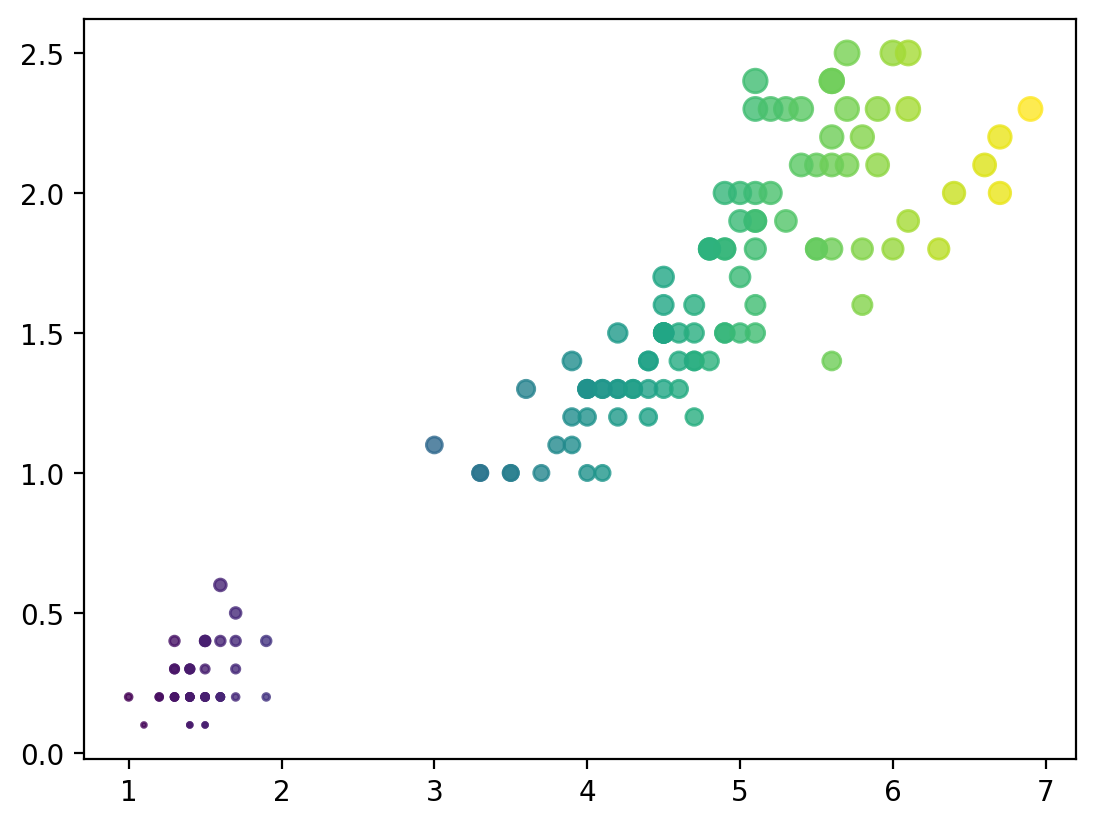

In [124]:
# display(iris.petal_length)
plt.scatter(
    iris.petal_length,
    iris.petal_width,
    s=iris.petal_width * 30,  # size
    c=iris.petal_length * 20,  # color
    alpha=.8)
plt.show()

### 2) boxplot (단점 : 분포를 몰라), violinplot()

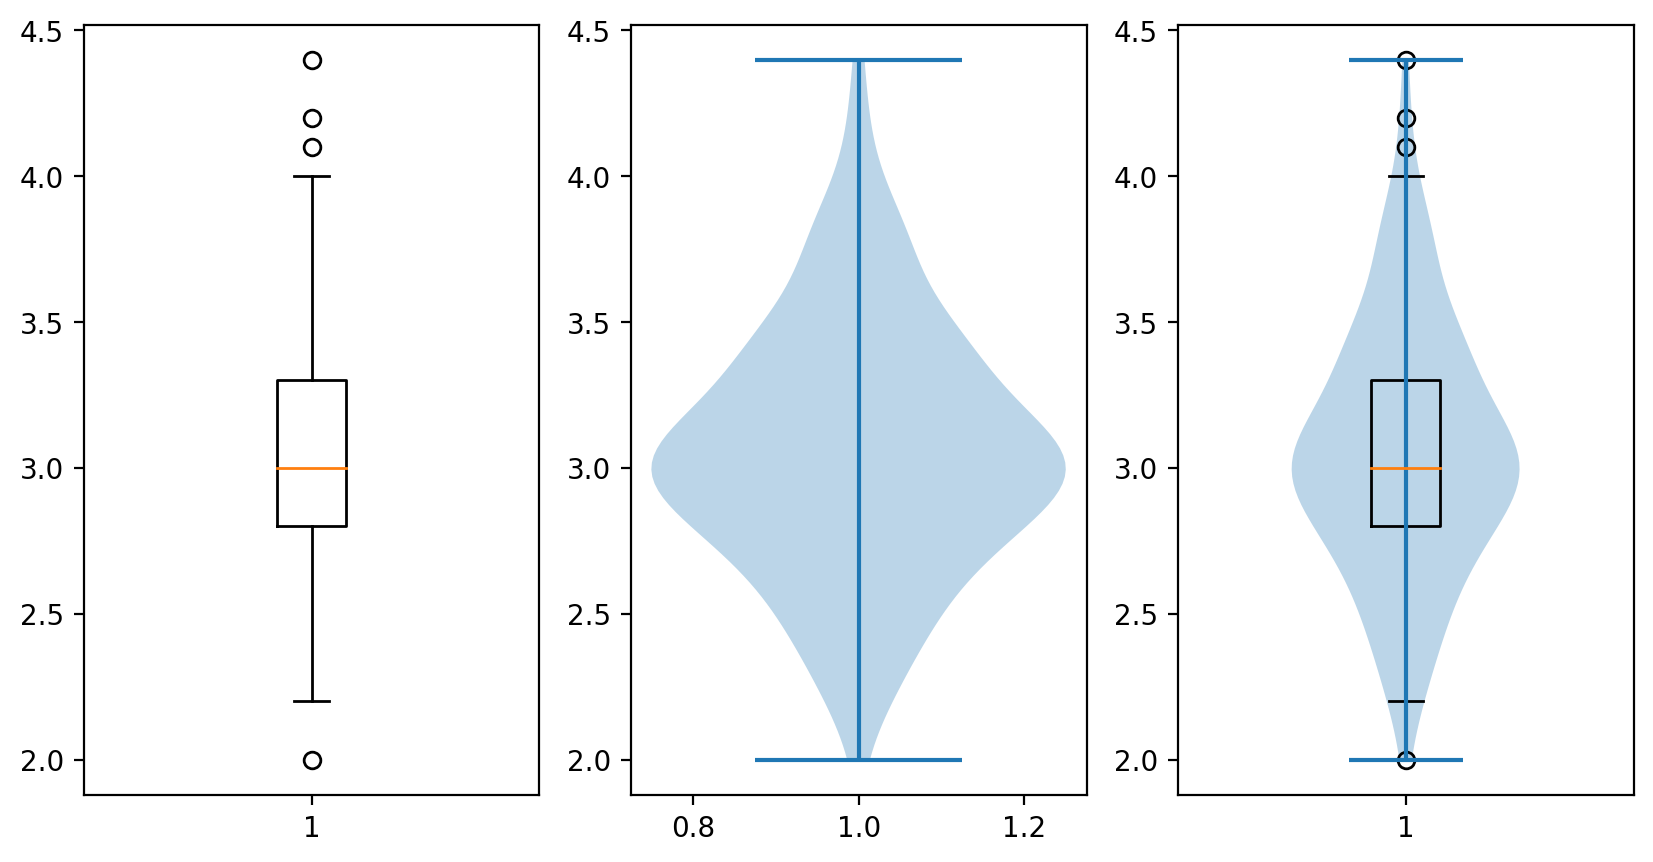

In [136]:
fig, axes = plt.subplots(ncols=3, figsize=(10,5))
axes[0].boxplot(iris.sepal_width)
axes[1].violinplot(iris.sepal_width)
axes[2].boxplot(iris.sepal_width)
axes[2].violinplot(iris.sepal_width)
plt.show()

### 3) bar(), barh(), axvline(수직선), axhline(수평선)

In [143]:
x = [1, 2, 3]
y = [3, 5, 4]

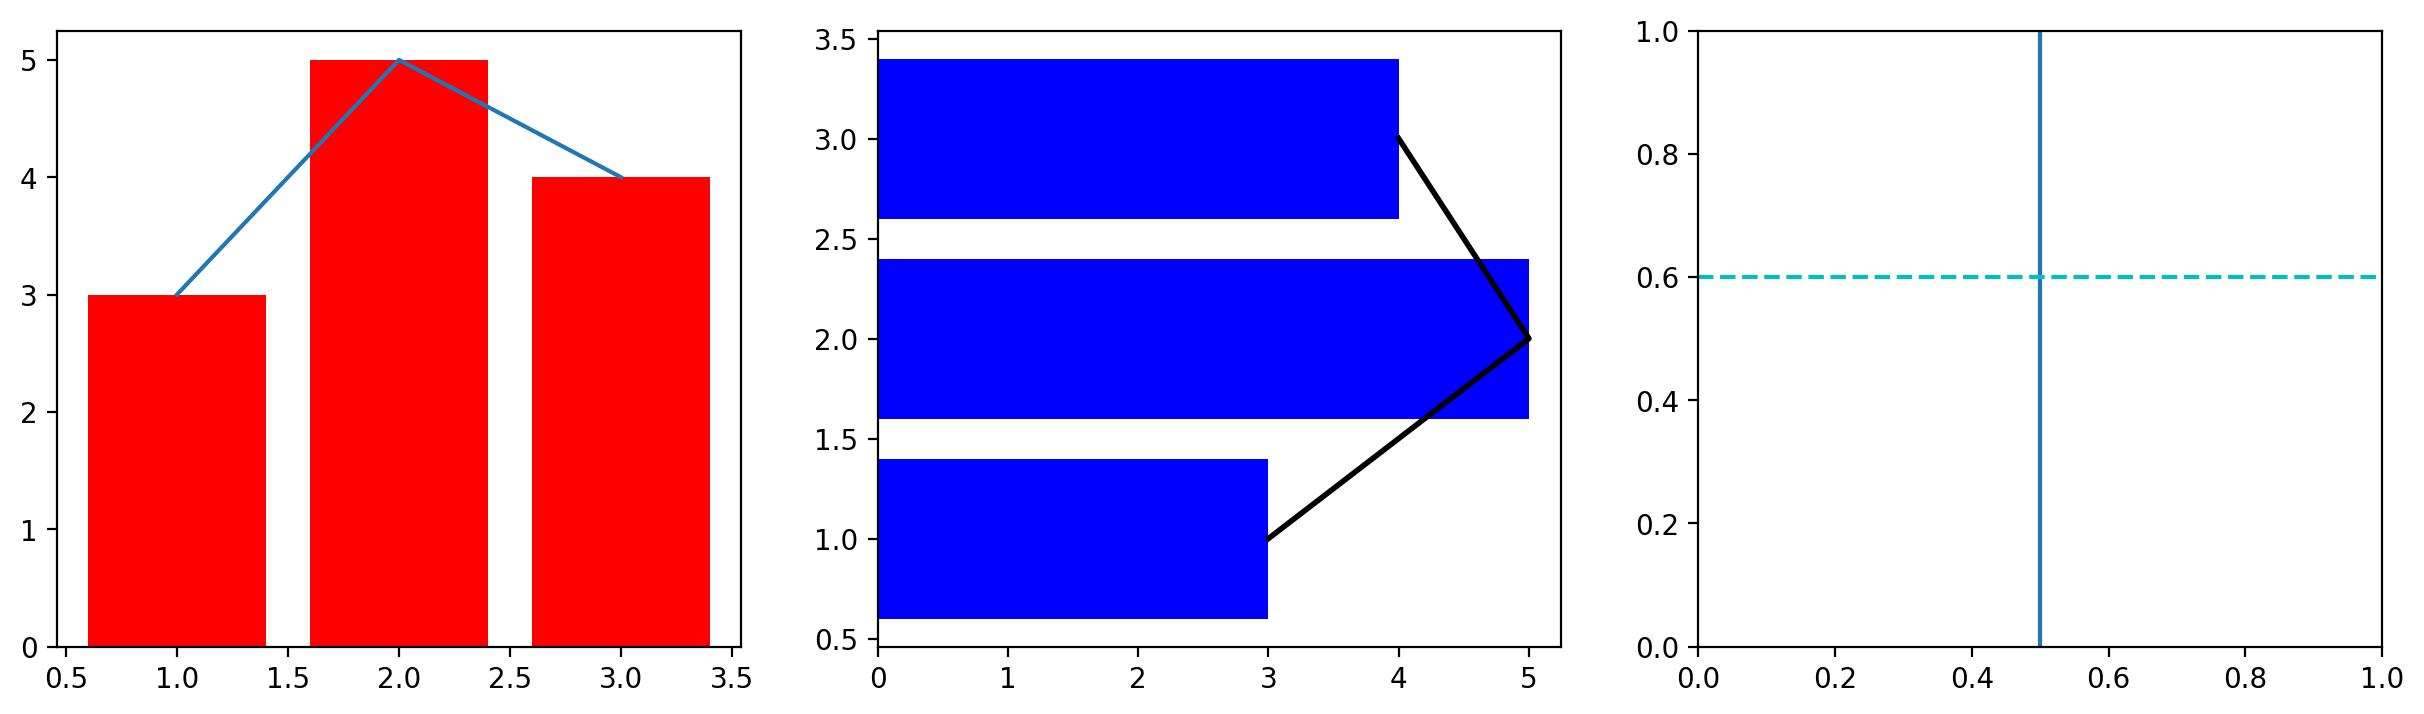

In [161]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

axes[0].bar(x, y, color='r')
axes[0].plot(x, y)

axes[1].barh(x, y, color='b')
axes[1].plot(y, x, 'k', linewidth=2)

axes[2].axvline(0.5)
axes[2].axhline(0.6, c='c', linestyle='--')

plt.show()

### 4) hist(도수분포표 ; 히스토그램 )

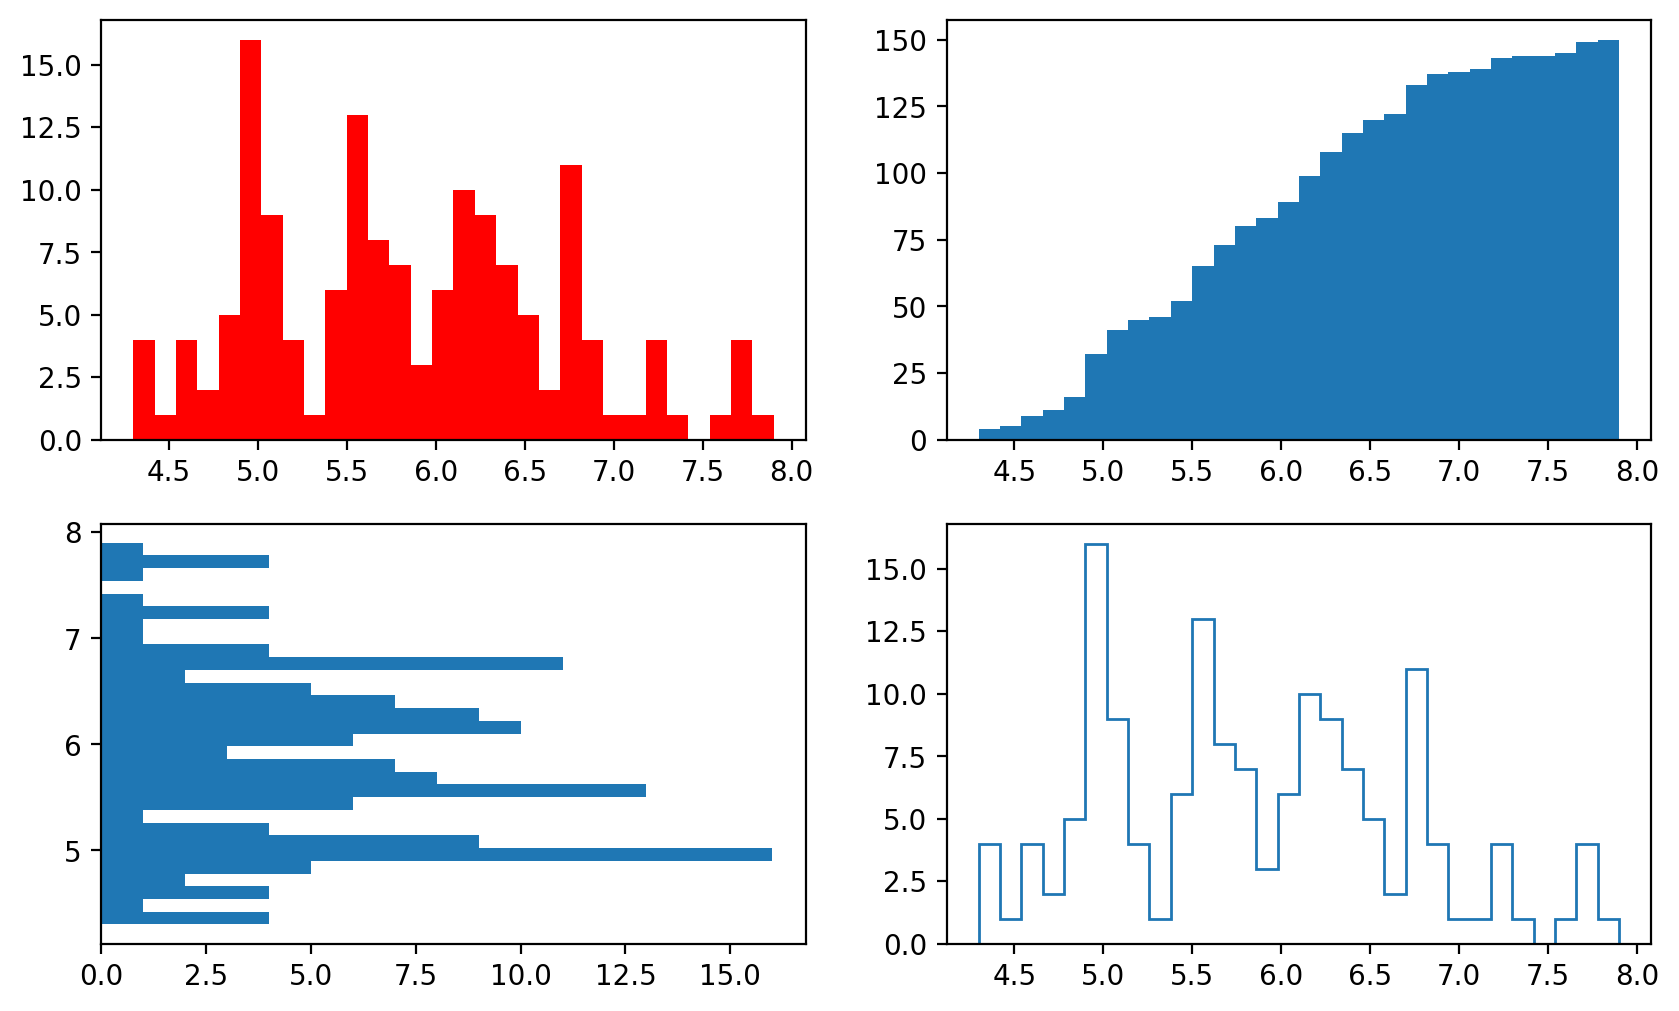

In [174]:
fig, axes = plt.subplots(nrows = 2, ncols=2, figsize=(10,6))

axes[0,0].hist(iris.sepal_length, bins=30, color='r') # 히스토그램 (도수분포표)
axes[0,1].hist(iris.sepal_length, bins=30, cumulative=True) # 누적히스토그램
axes[1,0].hist(iris.sepal_length, bins=30, orientation='horizontal') # 수평히스토그램
axes[1,1].hist(iris.sepal_length, bins=30, histtype='step') # 선(line)으로만 외곽선이 그려진 히스토그램

plt.show() 

## 1.5. 그래프 커스터마이징

### 1) linestyle, linewidth, color, maker ... (plt의 매개변수로 지정)

### 2) text(), annotate()

- [Text and annotations] https://matplotlib.org/stable/api/axes_api.html#text-and-annotations

In [53]:
# 개별 폰트 설정을 위한 방법
from matplotlib.font_manager import FontProperties
font_path = r'/Users/teamkim/Library/Fonts/D2Coding-Ver1.3.2-20180524.ttc' # 폰트 ttf 파일(네이버폰트, 구글폰트 등에서 다운로드 하거나 pc의 폰트 파일)
font_prop = FontProperties(fname=font_path, size=30)
font_prop

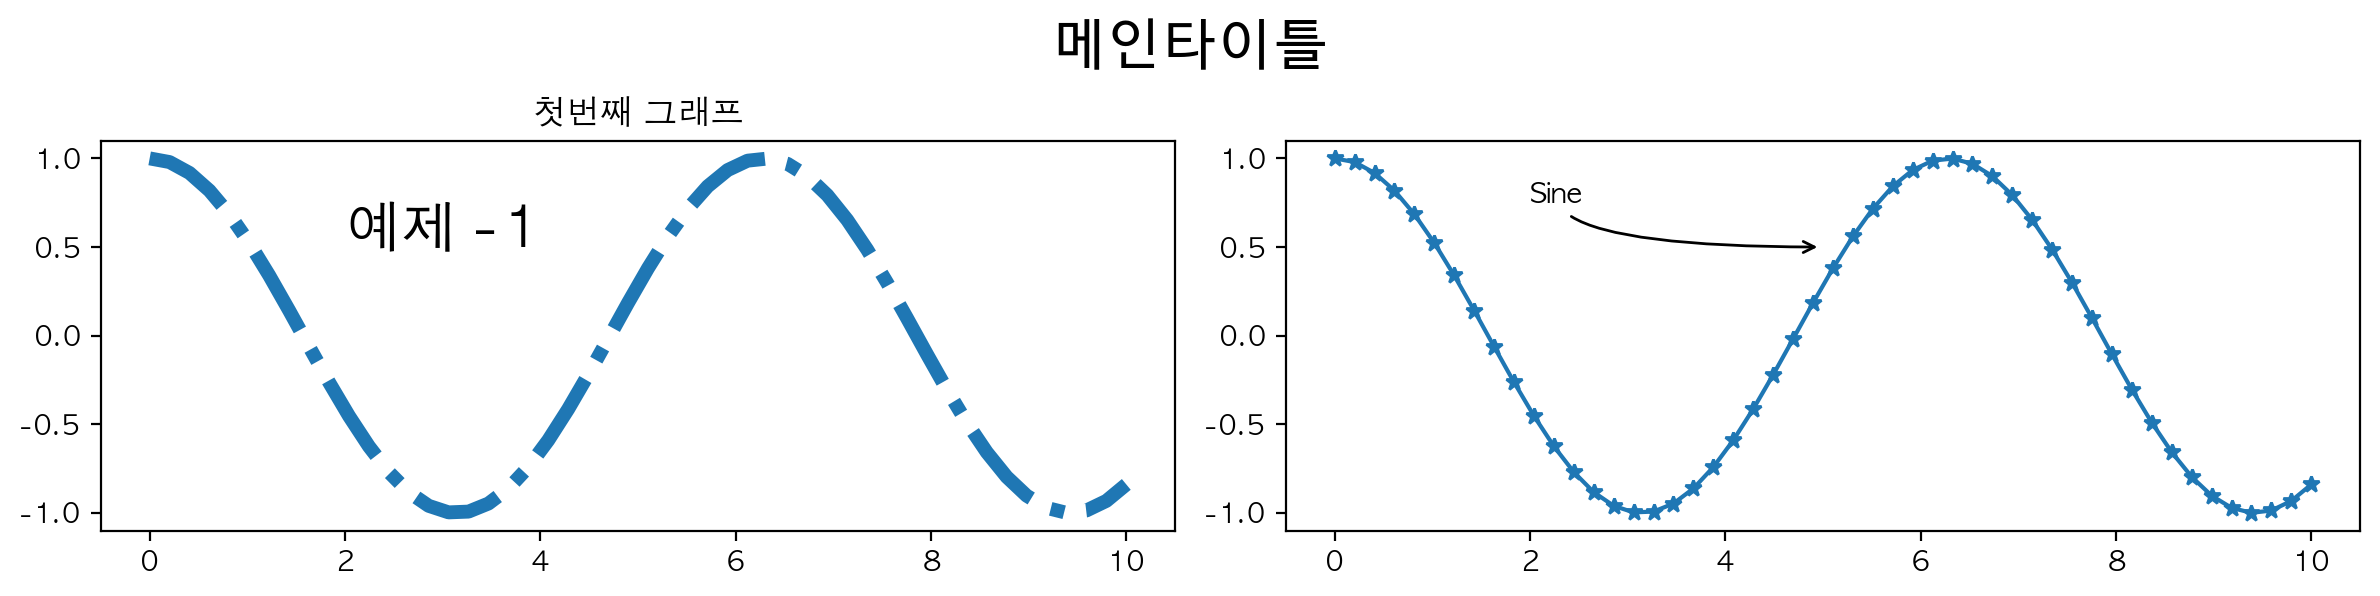

In [72]:
x = np.linspace(0, 10, 50)  # num = 50
y = np.cos(x)

fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(x, y, linewidth=5, linestyle='-.')
axes[0].text(2, 0.5, "예제 -1", fontsize=20)

axes[0].set_title('첫번째 그래프')

axes[1].plot(x, y, marker='*')

plt.annotate(
    'Sine',
    xytext=(2, 0.75),  # 글자가 있을 좌표 위치(좌상)
    xy=(5, 0.5),  # 화살표가 가리킬 좌표 위치
    arrowprops=dict(arrowstyle='->',
                    connectionstyle='angle3')  # angle(꺽은선), arc(직선),... 
)

# 메인타이틀 간격
plt.tight_layout(rect=[0, 0, 1, 0.9])  # left, bottom, right, top : 경계의 상대적 비율

plt.suptitle('메인타이틀', fontproperties=font_prop, fontsize=20)

plt.show()

### 3) 수학기호

- [Writing mathematical expressions] https://matplotlib.org/2.0.2/users/mathtext.html

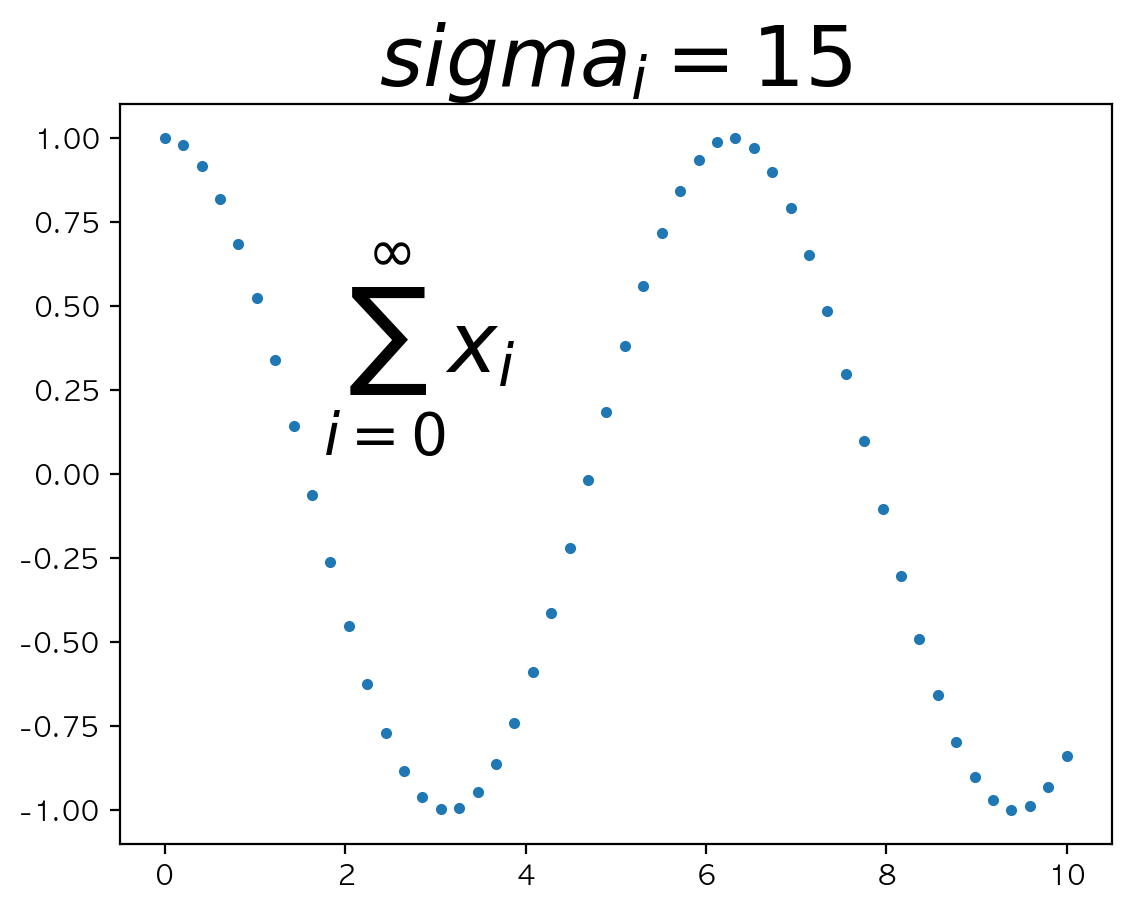

In [87]:
plt.scatter(x, y, marker=".")

plt.title(r'$sigma_i=15$',fontsize=30)
plt.text(1.75, 0.3, r'$\sum_{i=0}^\infty x_i$', fontsize=30)

plt.show()

### 4) 축과 눈금

- [교안 33 page] https://matplotlib.org/3.1.0/api/axis_api.html

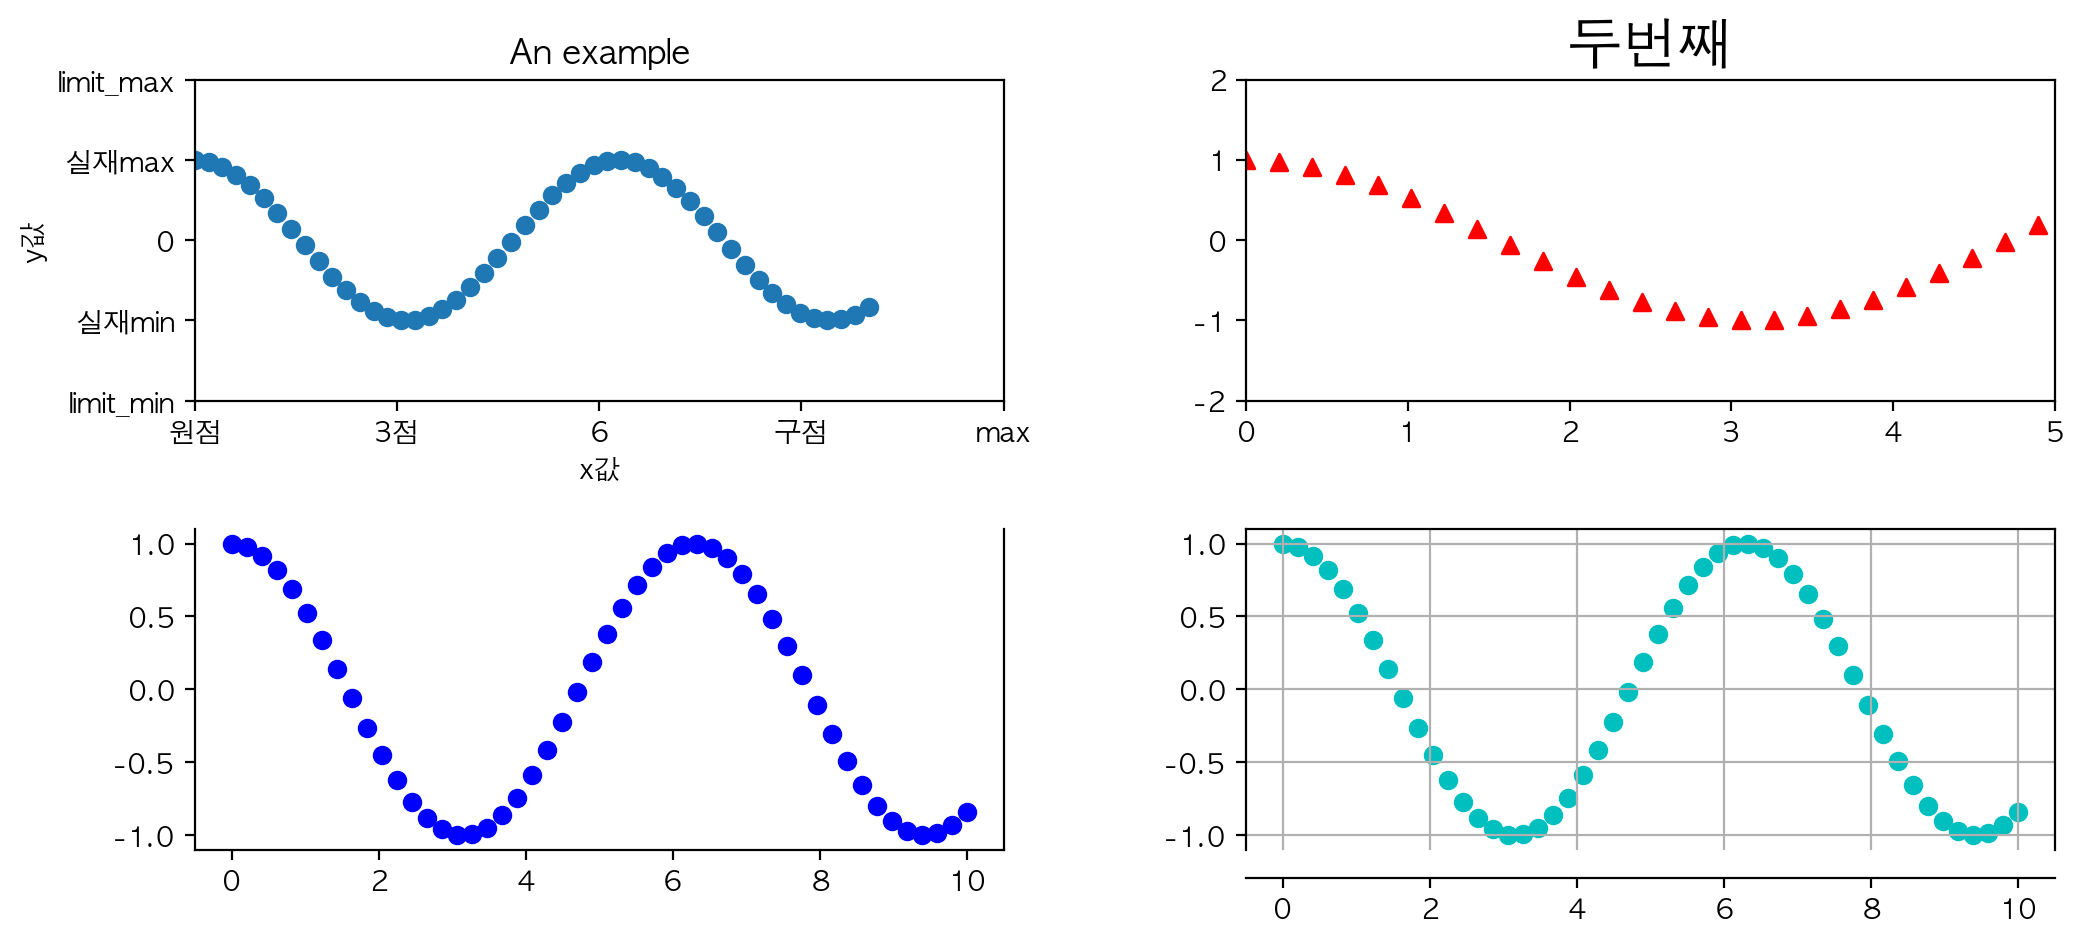

In [130]:
x = np.linspace(0, 10)  # 0 ~ 10 까지 50개
y = np.cos(x)

fig, axes = plt.subplots(2, 2, figsize=(12, 5))

# 서브플롯끼리 예백 조정 (hspace 위아래여백, wspace 좌우여백)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

axes[0, 0].scatter(x, y)
axes[0, 0].set(title='An example',
               ylabel="y값",
               xlabel="x값",
               xlim=[0, 12], # x축 눈금의 범위
               ylim=[-2, 2], # y축 눈금의 범위
               xticks=[0,3,6,9,12], # x축 눈금
               xticklabels = ['원점',"3점",6,"구점",'max'], # x축 눈금 라벨
               yticks = [-2,-1, 0, 1,2], # y축 눈금
               yticklabels = ['limit_min',"실재min",0,"실재max",'limit_max'], # y축 눈금 라벨
              ) 

axes[0, 1].scatter(x, y, c='r', marker='^')
axes[0, 1].set_title('두번째', fontsize=20)
axes[0, 1].set_xlim(0,5) # set(xlim=[0, 5])
axes[0, 1].set_ylim(-2,2) # set(ylim=[-2, 2])


axes[1, 0].scatter(x, y, c='b')
axes[1, 0].spines['top'].set_visible(False)

axes[1, 1].scatter(x, y, c='c')
axes[1, 1].spines['bottom'].set_position(('outward',10))
axes[1, 1].grid(True)

plt.show()

### 5) 축공유

In [134]:
x = np.arange(0,10)
y1 = 0.5 * x**2
y2 = -y1
print(x)
print(y1)
print(y2)

[0 1 2 3 4 5 6 7 8 9]
[ 0.   0.5  2.   4.5  8.  12.5 18.  24.5 32.  40.5]
[ -0.   -0.5  -2.   -4.5  -8.  -12.5 -18.  -24.5 -32.  -40.5]


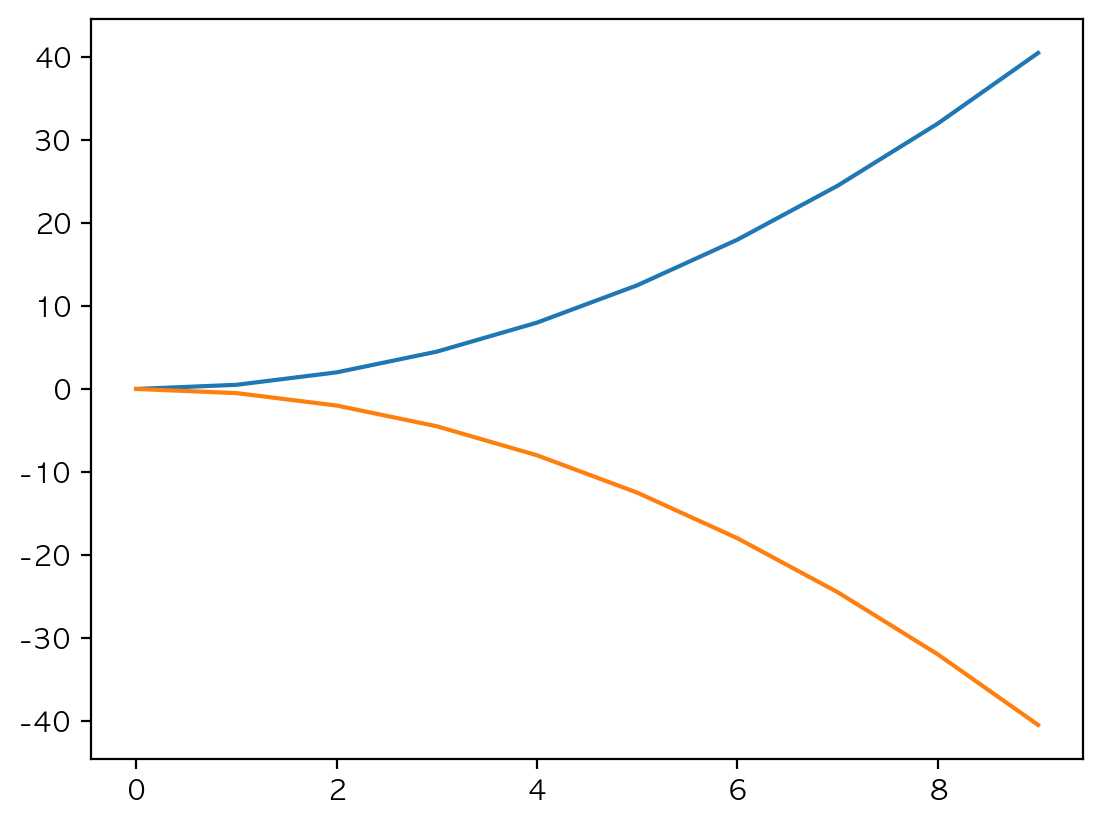

In [136]:
# 맘에 안 듬.
# 그래서 축공유를 한다.

plt.plot(x, y1)
plt.plot(x, y2)


plt.show()

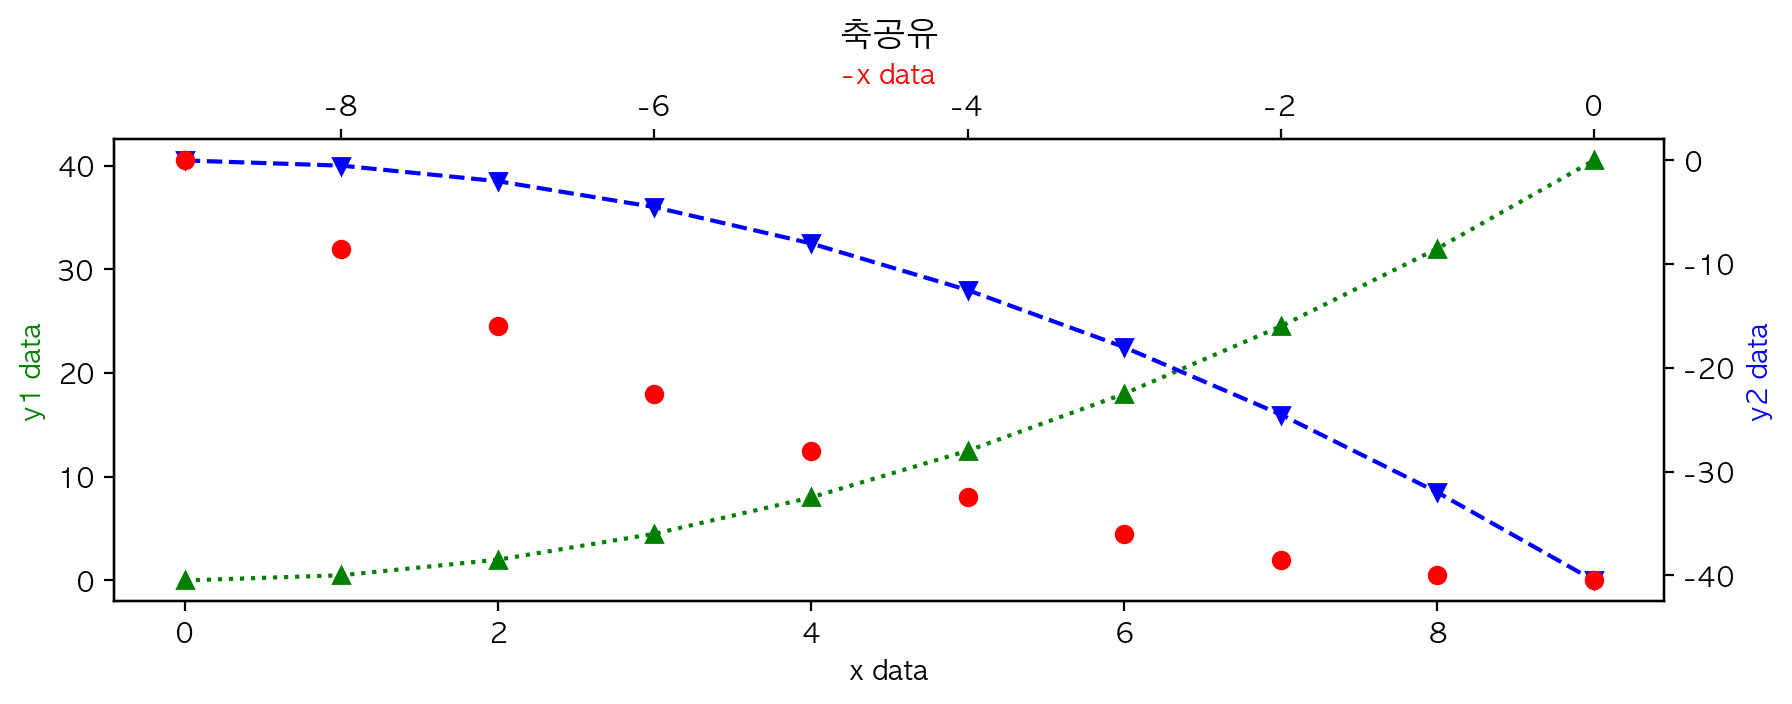

In [162]:
fig, ax1 = plt.subplots(nrows=1,ncols=1, figsize=(10,3))

ax1.plot(x, y1,'g^:')
ax1.set(title="축공유", xlabel="x data")
ax1.set_ylabel("y1 data", color='g')

ax2 = ax1.twinx() # ax1과, x축을 공유하는 ax2
ax2.plot(x, y2, 'bv--')
ax2.set_ylabel('y2 data', color='b')

ax3 = ax1.twiny() # ax1과 y축을 공유하는 ax3
ax3.plot(-x, y1, 'ro')
ax3.set_xlabel('-x data', color='r')

plt.show()

### 6) 범례표시

- [범례사용]

### 7) 플롯 스타일 지정

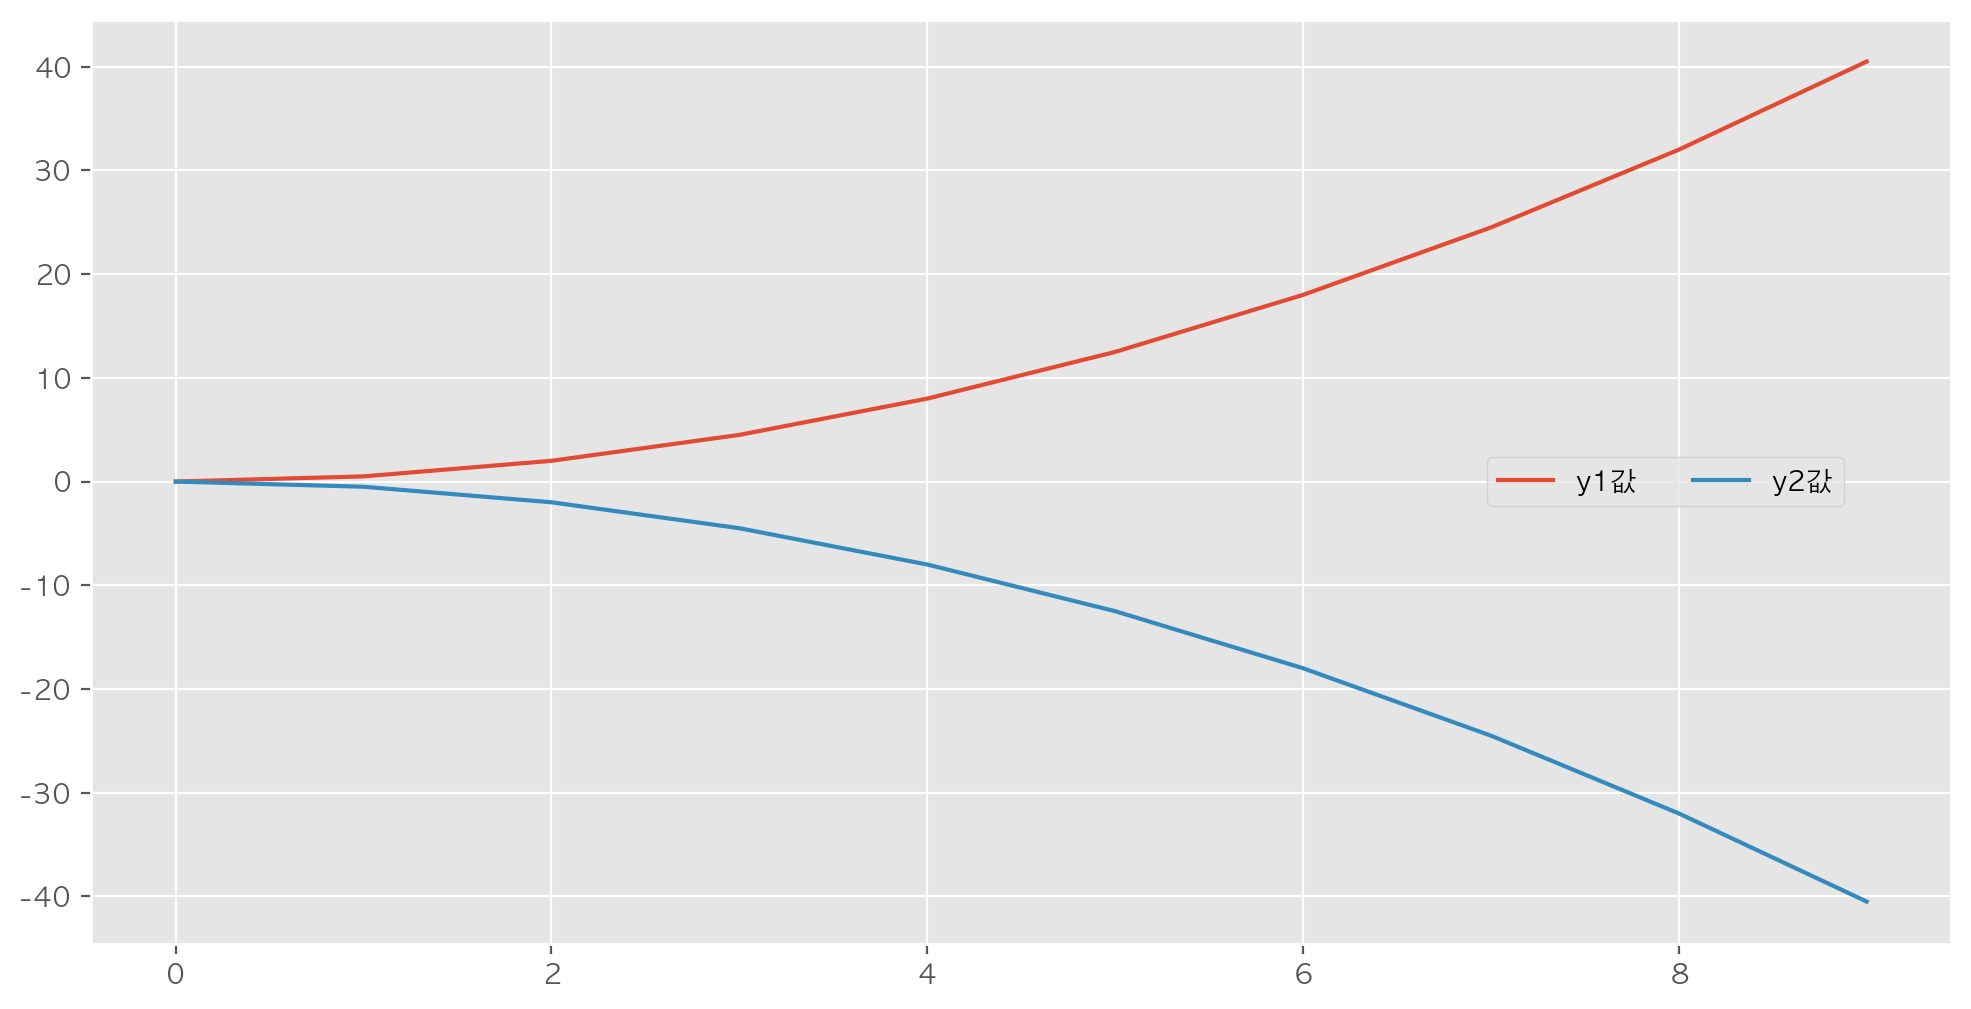

In [182]:
plt.style.use('ggplot') # 스타일 지정하는 함수를 쓰면 모든 설정 초기화
plt.figure(figsize=(12,6))
plt.plot(x, y1, label='y1값')
plt.plot(x, y2, label='y2값')

plt.legend(loc='center right', ncol=2, bbox_to_anchor=(0.95, 0.5))

plt.show()